In [45]:
import pandas as pd
import numpy as np

###  数据预处理

In [46]:
# 数据读取
data = pd.read_csv('heloc_dataset_v1.csv')

# 二值化
mapping = {'Bad':0, 'Good':1}
data['RiskPerformance'] = data['RiskPerformance'].map(mapping)
data_x = data.iloc[:, 1:]
# 异常值处理
for i in range(0, data_x.shape[0]):
    for j in range(0, data_x.shape[1]):
        if data_x.iloc[i, j] < 0:
            data_x.iloc[i, j] = np.median(data_x.iloc[:, j])
            
# 标准化
from sklearn.preprocessing import StandardScaler
data_x =StandardScaler().fit_transform(data_x)

data_y = data.iloc[:, 0]
print(data_y)
print(data_x[0:6])

0        0
1        0
2        0
3        0
4        0
        ..
10454    1
10455    0
10456    0
10457    0
10458    0
Name: RiskPerformance, Length: 10459, dtype: int64
[[-1.77301052 -0.58359569 -0.42180688  0.1658194  -0.09103581  2.02447455
  -0.37478323 -0.83407676 -0.2397059  -1.73385093 -0.7525858   0.04054909
  -0.45622983  0.49166775 -0.42613588 -0.68839603 -0.67448879 -0.04040174
  -0.59889909  1.35905919 -0.92892669  0.0201757   0.11778606]
 [-1.14723506 -1.49664617  0.44862754 -1.13283309 -1.72608477  2.85035719
   3.75355565  0.64840305 -0.68073158 -3.61059443  0.91553264 -1.22495762
  -1.01582967  1.86619967 -0.42613588 -0.68839603 -0.67448879 -1.22214245
  -0.59889909 -1.37526803 -0.27370385 -0.65185511 -3.10849347]
 [-0.5214596  -1.41171124 -0.34267648 -1.64625384 -1.0902324  -0.45317339
  -0.37478323  0.64840305 -0.68073158  0.76847374  0.91553264 -1.06676928
   1.22256968  0.54893991 -0.42613588  1.23672004  1.2879504   0.67580474
   0.25754346 -0.00810442 -0.2737038

### 特征选择 

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# RFE(estimator=LogisticRegression(), n_features_to_select = 10).fit_transform(data_x, data_y)
# print(data_x)

### LDA降维

In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#LinearDiscriminantAnalysis(n_components = 7).fit_transform(data_x, data_y)

### 训练集与测试集提取

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 1/3, random_state=666)

### 模型构建与预测精度 

In [51]:
def accuracy(clf_class, **kwargs):
    clf = clf_class(**kwargs)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return np.mean(y_test == y_pred)

# 逻辑回归
from sklearn.linear_model import LogisticRegression as LOG
# 随机森林
from sklearn.ensemble import RandomForestClassifier as RF
# K近邻
from sklearn.neighbors import KNeighborsClassifier as KNN
# 高斯朴素贝叶斯
from sklearn.naive_bayes import GaussianNB as BYS

# 预测精度
print("-----------------------------------------------------------")
print("LogisticRegression")
print("%.4f" % accuracy(LOG))
print("-----------------------------------------------------------")
print("svm")
print("%.4f" % accuracy(SVC))
print("-----------------------------------------------------------")
print("KNeighbors")
print("%.4f" % accuracy(KNN))
print("-----------------------------------------------------------")
print("GaussianNB")
print("%.4f" % accuracy(BYS))
print("-----------------------------------------------------------")

-----------------------------------------------------------
LogisticRegression
0.7207
-----------------------------------------------------------
svm


F:\Users\zhuxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Users\zhuxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7215
-----------------------------------------------------------
RandomForest


F:\Users\zhuxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6966
-----------------------------------------------------------
KNeighbors
0.6883
-----------------------------------------------------------
GaussianNB
0.6972


### ROC曲线 

In [58]:
def pred_values(clf_class, **kwargs):
    clf = clf_class(**kwargs)
    clf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_test)
    return y_pred

# 逻辑回归
from sklearn.linear_model import LogisticRegression as LOG
# 随机森林
from sklearn.ensemble import RandomForestClassifier as RF
# K近邻
from sklearn.neighbors import KNeighborsClassifier as KNN
# 高斯朴素贝叶斯
from sklearn.naive_bayes import GaussianNB as BYS


F:\Users\zhuxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Users\zhuxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


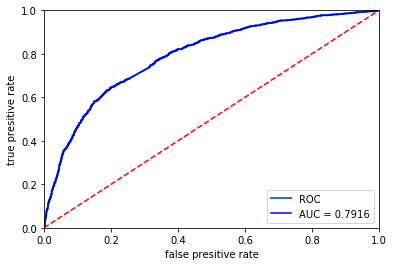

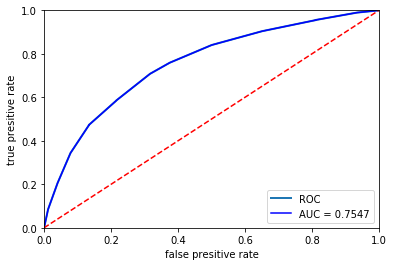

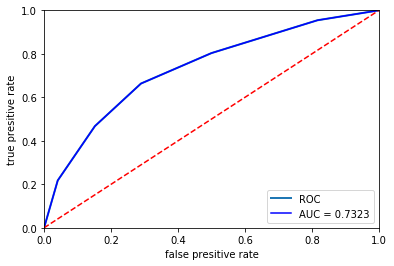

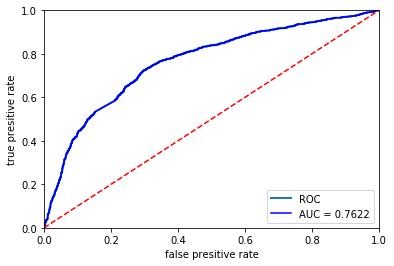

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plt_roc(y_proba):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label = 1)
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = "ROC")
    plt.xlabel("false presitive rate")
    plt.ylabel("true presitive rate")
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 4)
    plt.show()

y_pro_LOG = pred_values(LOG)[:, 1]
y_pro_RF = pred_values(RF)[:, 1]
y_pro_KNN = pred_values(KNN)[:, 1]
y_pro_BYS = pred_values(BYS)[:, 1]

plt_roc(y_pro_LOG)
plt_roc(y_pro_RF)
plt_roc(y_pro_KNN)
plt_roc(y_pro_BYS)